In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("resultados_clean.xlsx", header=1)

In [3]:
df.columns

Index(['LLM', 'Prompt', 'Output_Protein A', 'Quality_Protein_A',
       'Output_Interaction Type', 'Quality_Interaction_Type',
       'Output_Protein B', 'Quality_Protein_B', 'Prompt.1', 'Example'],
      dtype='object')

In [4]:
df = df[["LLM", "Prompt", "Output_Protein A","Output_Interaction Type", "Output_Protein B", "Quality_Protein_A", "Quality_Interaction_Type", "Quality_Protein_B"]] 

### Creation of Quality Labels

In [5]:
# Define mapping dictionaries
protein_label_map = {
    'RP': 'Good',
    'RPT': 'Neutral',
    'N': 'Bad',
    'RT': 'Bad',
    'PT': 'Neutral',
    'R': 'Bad',
    'T': 'Bad',
    'P': 'Good'
}

interaction_label_map = {
    'IT': 'Good',
    'NIT': 'Neutral',
    'N': 'Bad'
}


In [6]:
# Apply the mappings
df['Quality_Protein_A_Simplified'] = df['Quality_Protein_A'].map(protein_label_map)
df['Quality_Protein_B_Simplified'] = df['Quality_Protein_B'].map(protein_label_map)
df['Quality_Interaction_Type_Simplified'] = df['Quality_Interaction_Type'].map(interaction_label_map)

### Quality of Protein A outputs

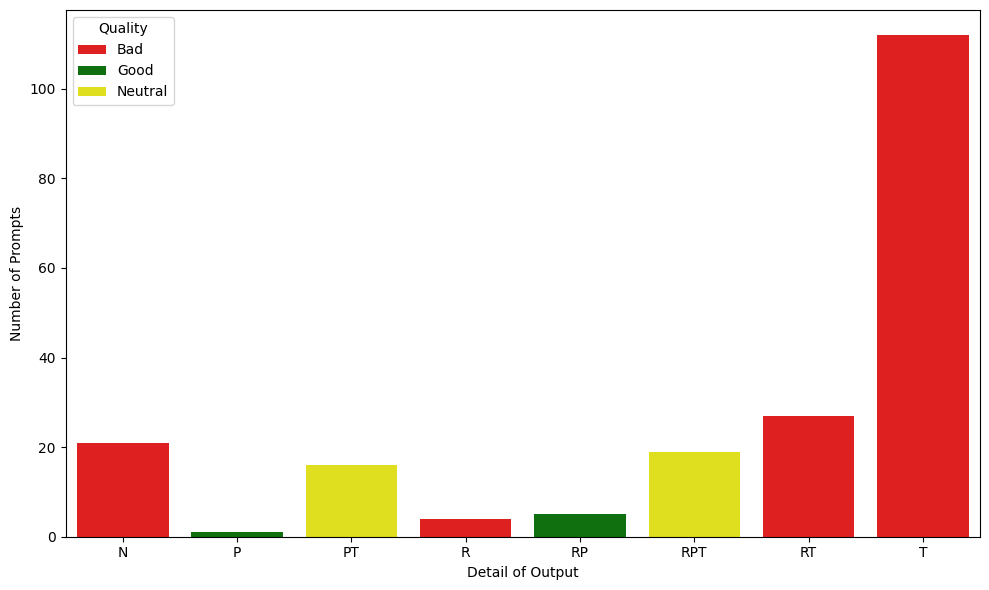

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count each detailed label and its quality group
label_counts = df.groupby(['Quality_Protein_A', 'Quality_Protein_A_Simplified']).size().reset_index(name='Count')

# Plot with seaborn — hue as quality group
plt.figure(figsize=(10, 6))
sns.barplot(data=label_counts, x='Quality_Protein_A', y='Count', hue='Quality_Protein_A_Simplified',
            palette={'Good': 'green', 'Neutral': 'yellow', 'Bad': 'red'})

#plt.title('Protein A output grouped by quality')
plt.xlabel('Detail of Output')
plt.ylabel('Number of Prompts')
plt.legend(title='Quality')
plt.tight_layout()
plt.show()


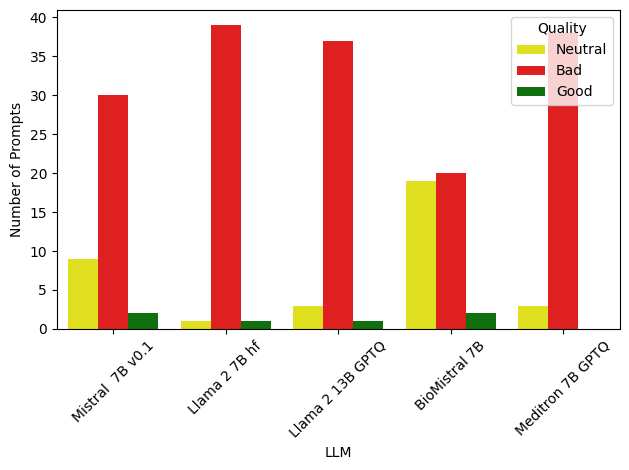

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for Protein A
sns.countplot(data=df, x='LLM', hue='Quality_Protein_A_Simplified', palette={'Good': 'green', 'Neutral': 'yellow', 'Bad': 'red'})
#plt.title("Quality of Protein A output per LLM")
plt.ylabel("Number of Prompts")
plt.legend(title='Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


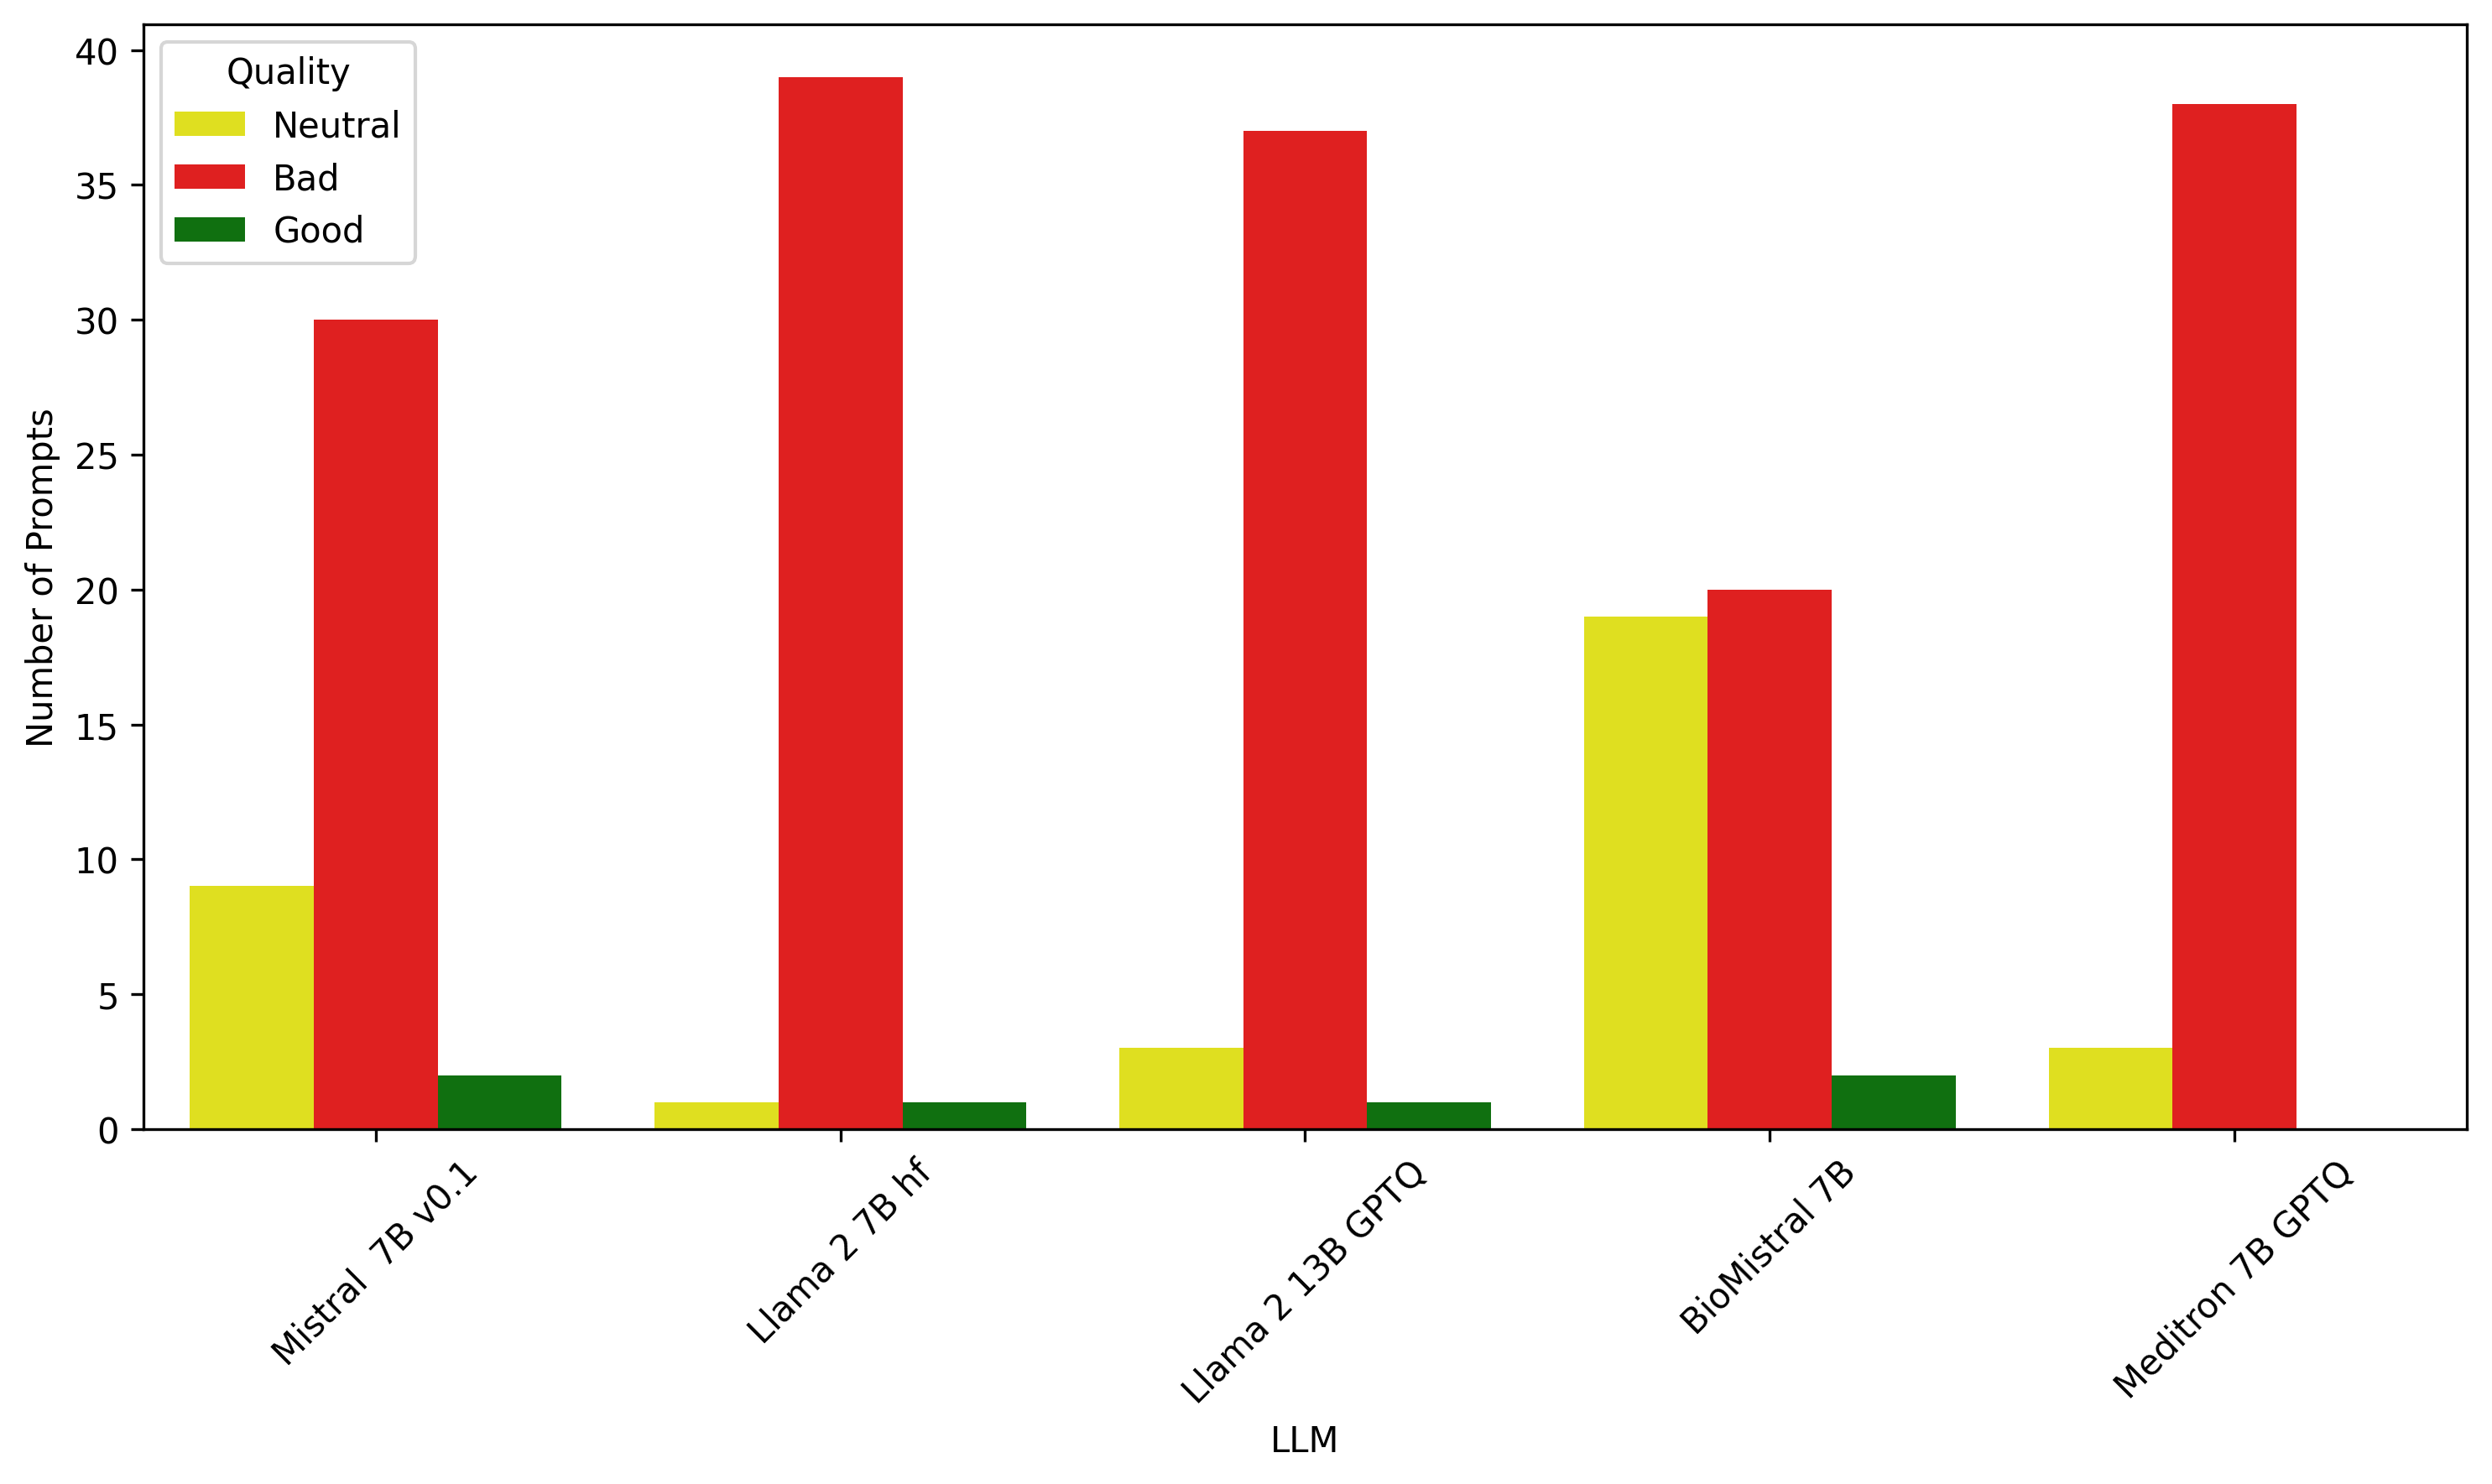

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with higher resolution
plt.figure(figsize=(10, 6), dpi=300)  # Increase dpi for higher resolution

# Plot
sns.countplot(
    data=df,
    x='LLM',
    hue='Quality_Protein_A_Simplified',
    palette={'Good': 'green', 'Neutral': 'yellow', 'Bad': 'red'}
)

# Labels, legend, and layout
plt.ylabel("Number of Prompts")
plt.legend(title='Quality')
plt.xticks(rotation=45)
plt.tight_layout()

# Show figure
plt.show()


### Quality of Protein B outputs

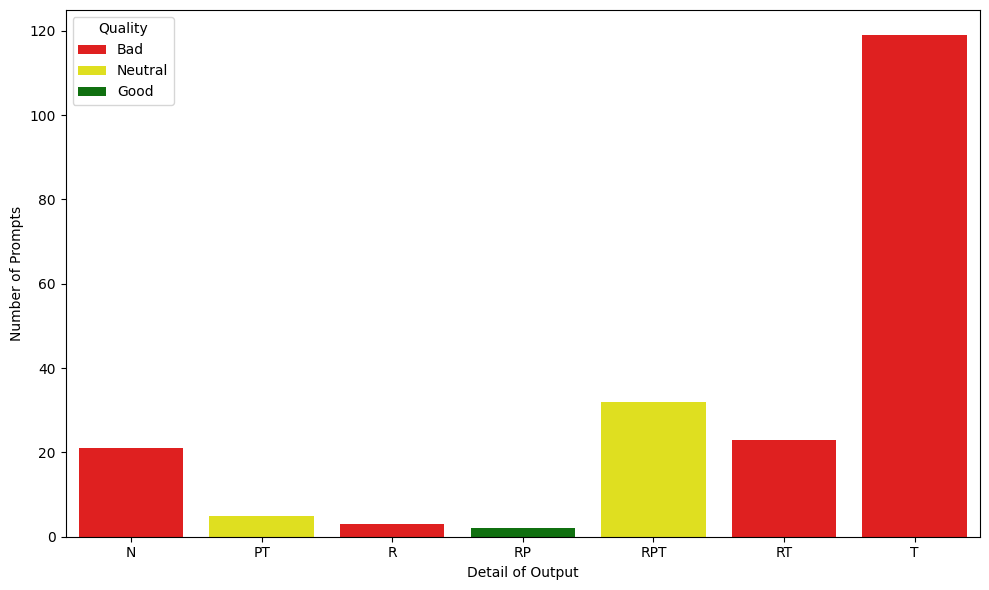

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count each detailed label and its quality group
label_counts = df.groupby(['Quality_Protein_B', 'Quality_Protein_B_Simplified']).size().reset_index(name='Count')

# Plot with seaborn — hue as quality group
plt.figure(figsize=(10, 6))
sns.barplot(data=label_counts, x='Quality_Protein_B', y='Count', hue='Quality_Protein_B_Simplified',
            palette={'Good': 'green', 'Neutral': 'yellow', 'Bad': 'red'})

#plt.title('Protein B output grouped by quality')
plt.xlabel('Detail of Output')
plt.ylabel('Number of Prompts')
plt.legend(title='Quality')
plt.tight_layout()
plt.show()

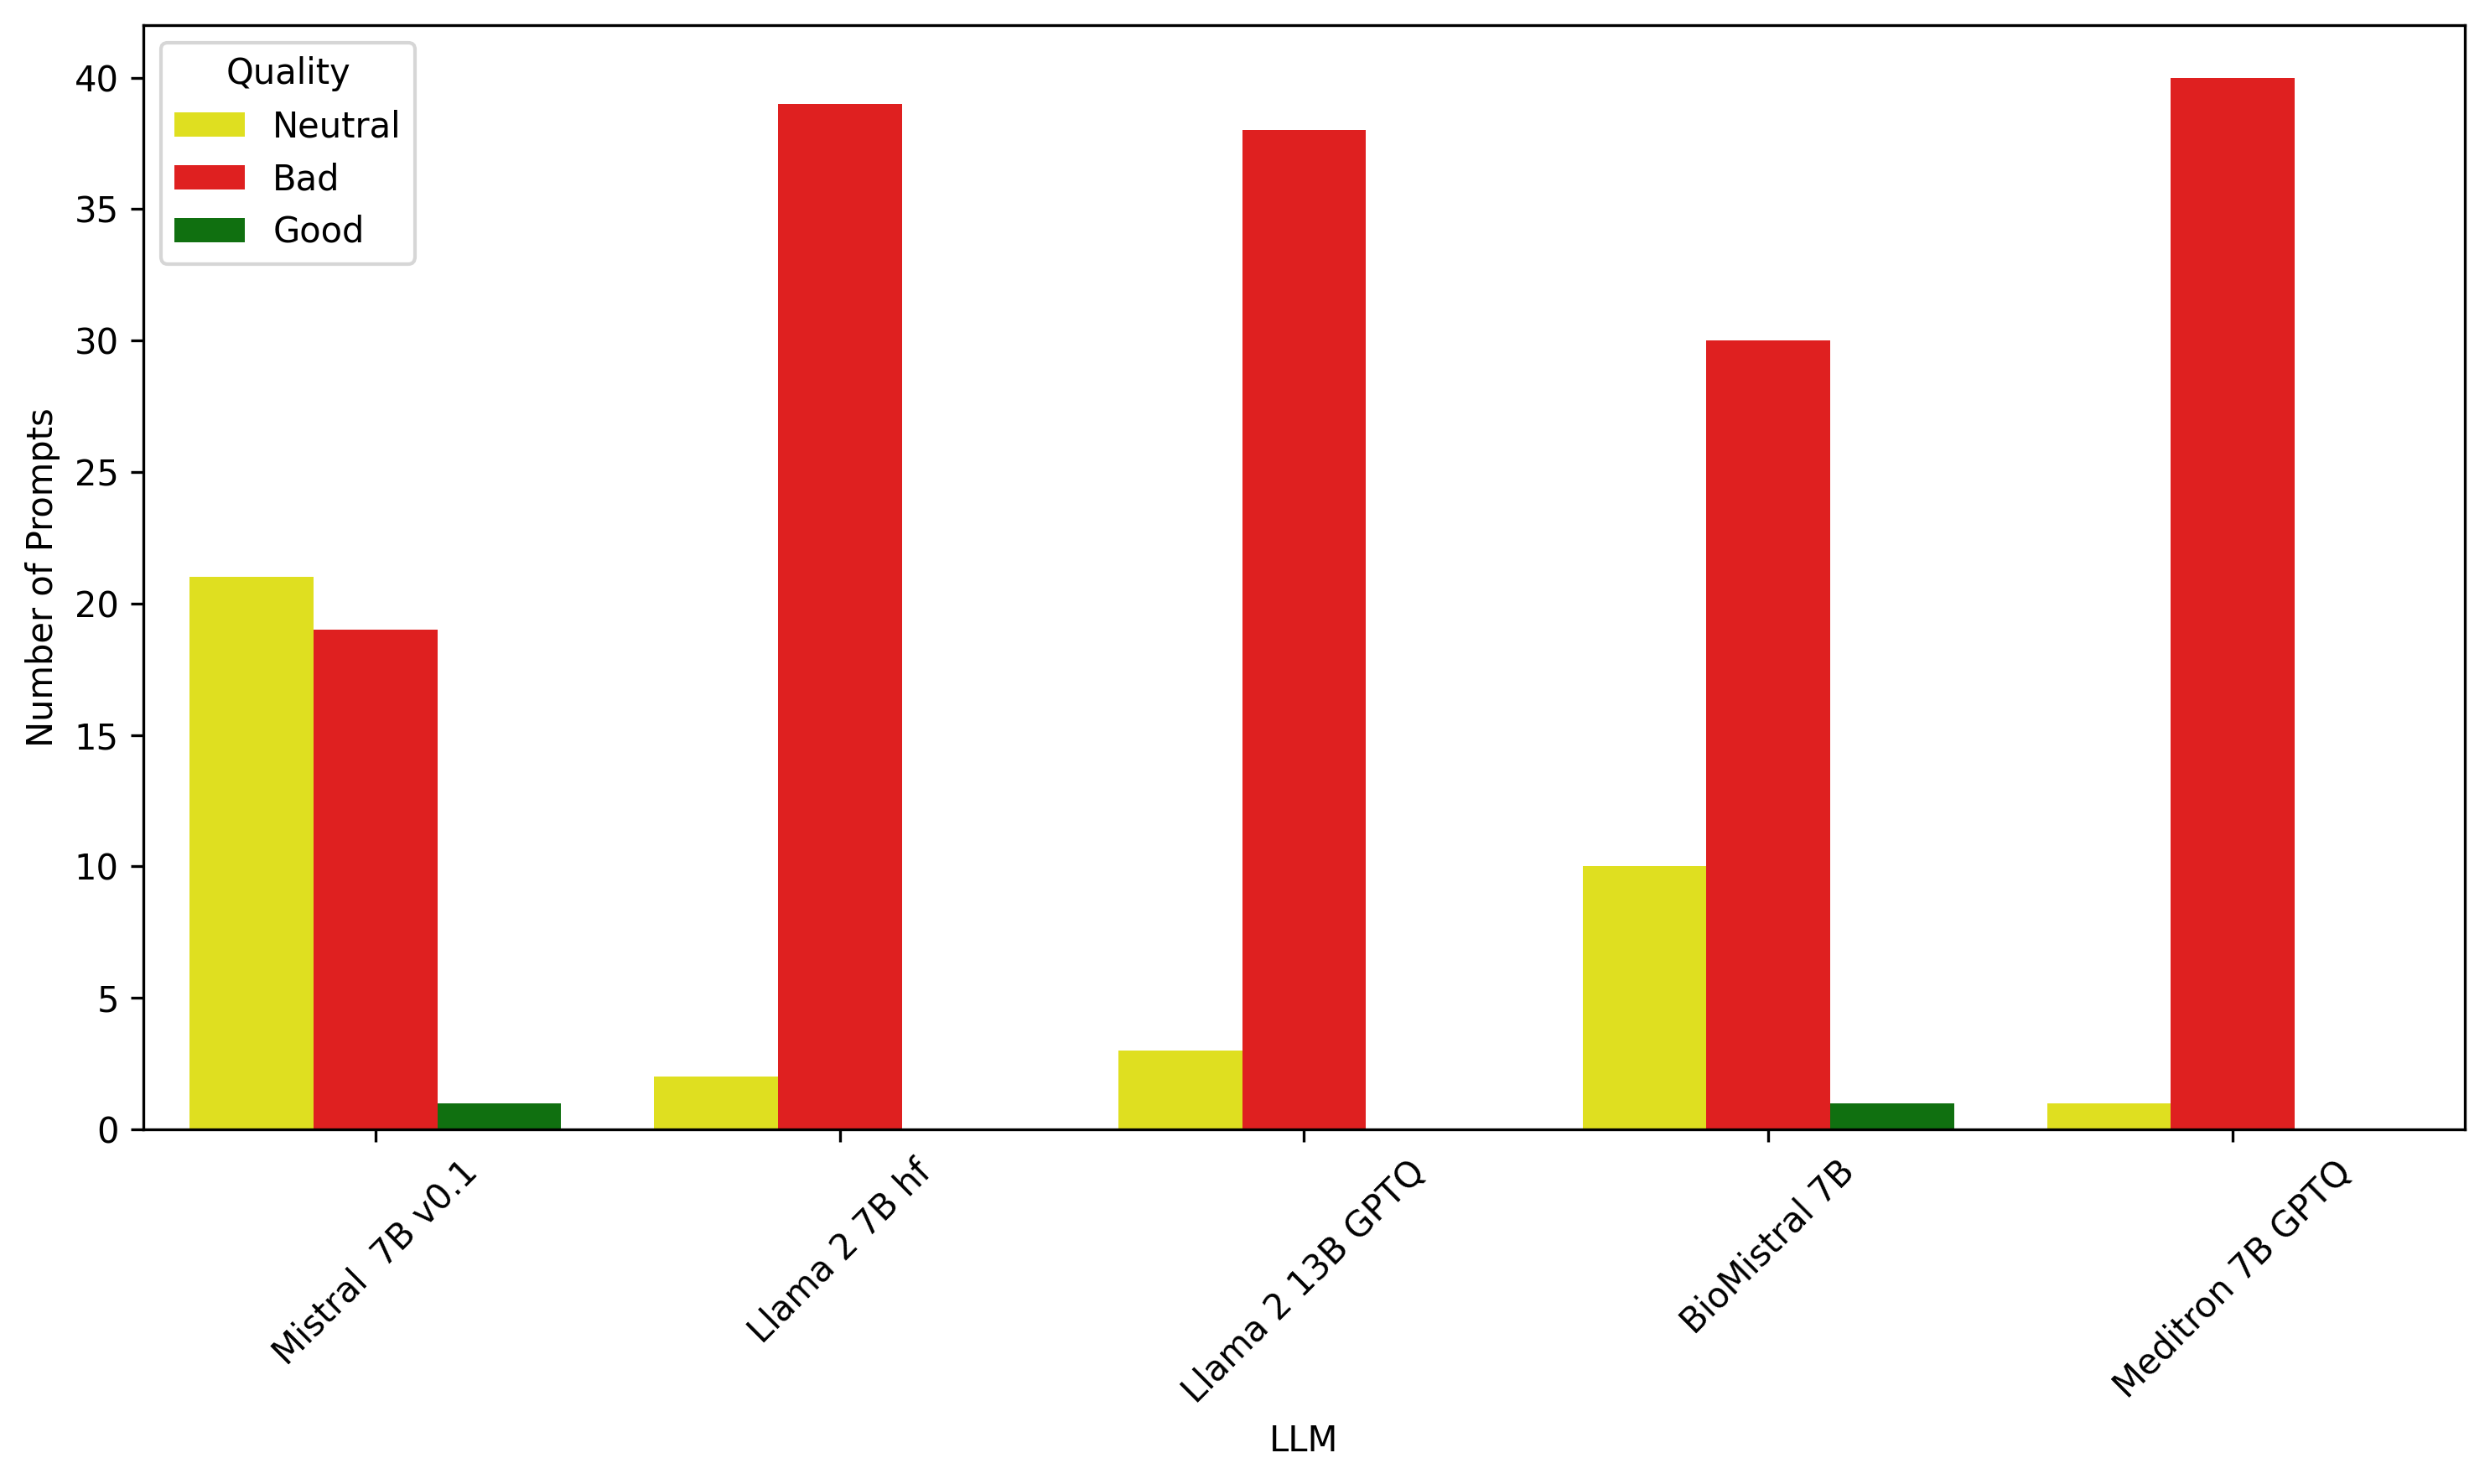

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a high-resolution figure
plt.figure(figsize=(10, 6), dpi=300)  # Larger figure and higher resolution

# Plot
sns.countplot(
    data=df,
    x='LLM',
    hue='Quality_Protein_B_Simplified',
    palette={'Good': 'green', 'Neutral': 'yellow', 'Bad': 'red'}
)

# Labels, legend, and layout
plt.ylabel("Number of Prompts")
plt.legend(title='Quality')
plt.xticks(rotation=45)
plt.tight_layout()

# Show figure
plt.show()


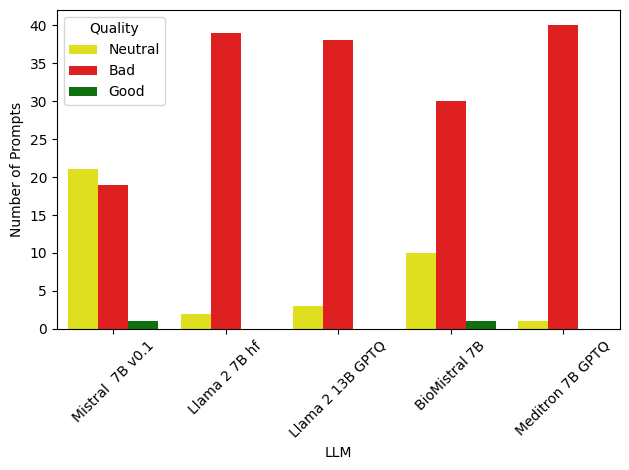

In [10]:
sns.countplot(data=df, x='LLM', hue='Quality_Protein_B_Simplified', palette={'Good': 'green', 'Neutral': 'yellow', 'Bad': 'red'})
#plt.title("Quality of Protein B output per LLM")
plt.ylabel("Number of Prompts")
plt.legend(title='Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Quality of Interaction Type outputs

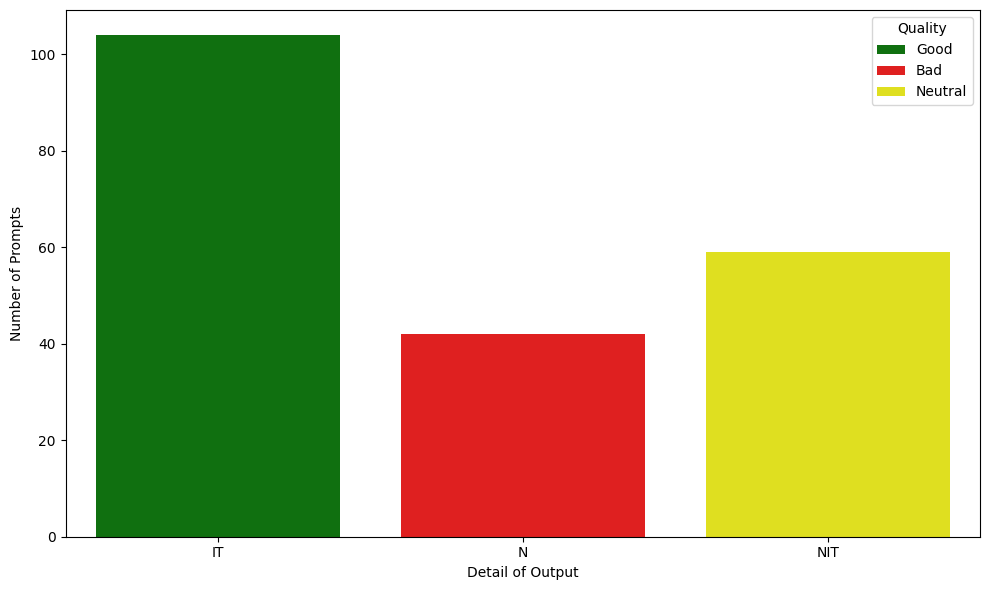

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count each detailed label and its quality group
label_counts = df.groupby(['Quality_Interaction_Type', 'Quality_Interaction_Type_Simplified']).size().reset_index(name='Count')

# Plot with seaborn — hue as quality group
plt.figure(figsize=(10, 6))
sns.barplot(data=label_counts, x='Quality_Interaction_Type', y='Count', hue='Quality_Interaction_Type_Simplified',
            palette={'Good': 'green', 'Neutral': 'yellow', 'Bad': 'red'})

#plt.title('Interaction type output grouped by quality')
plt.xlabel('Detail of Output')
plt.ylabel('Number of Prompts')
plt.legend(title='Quality')
plt.tight_layout()
plt.show()

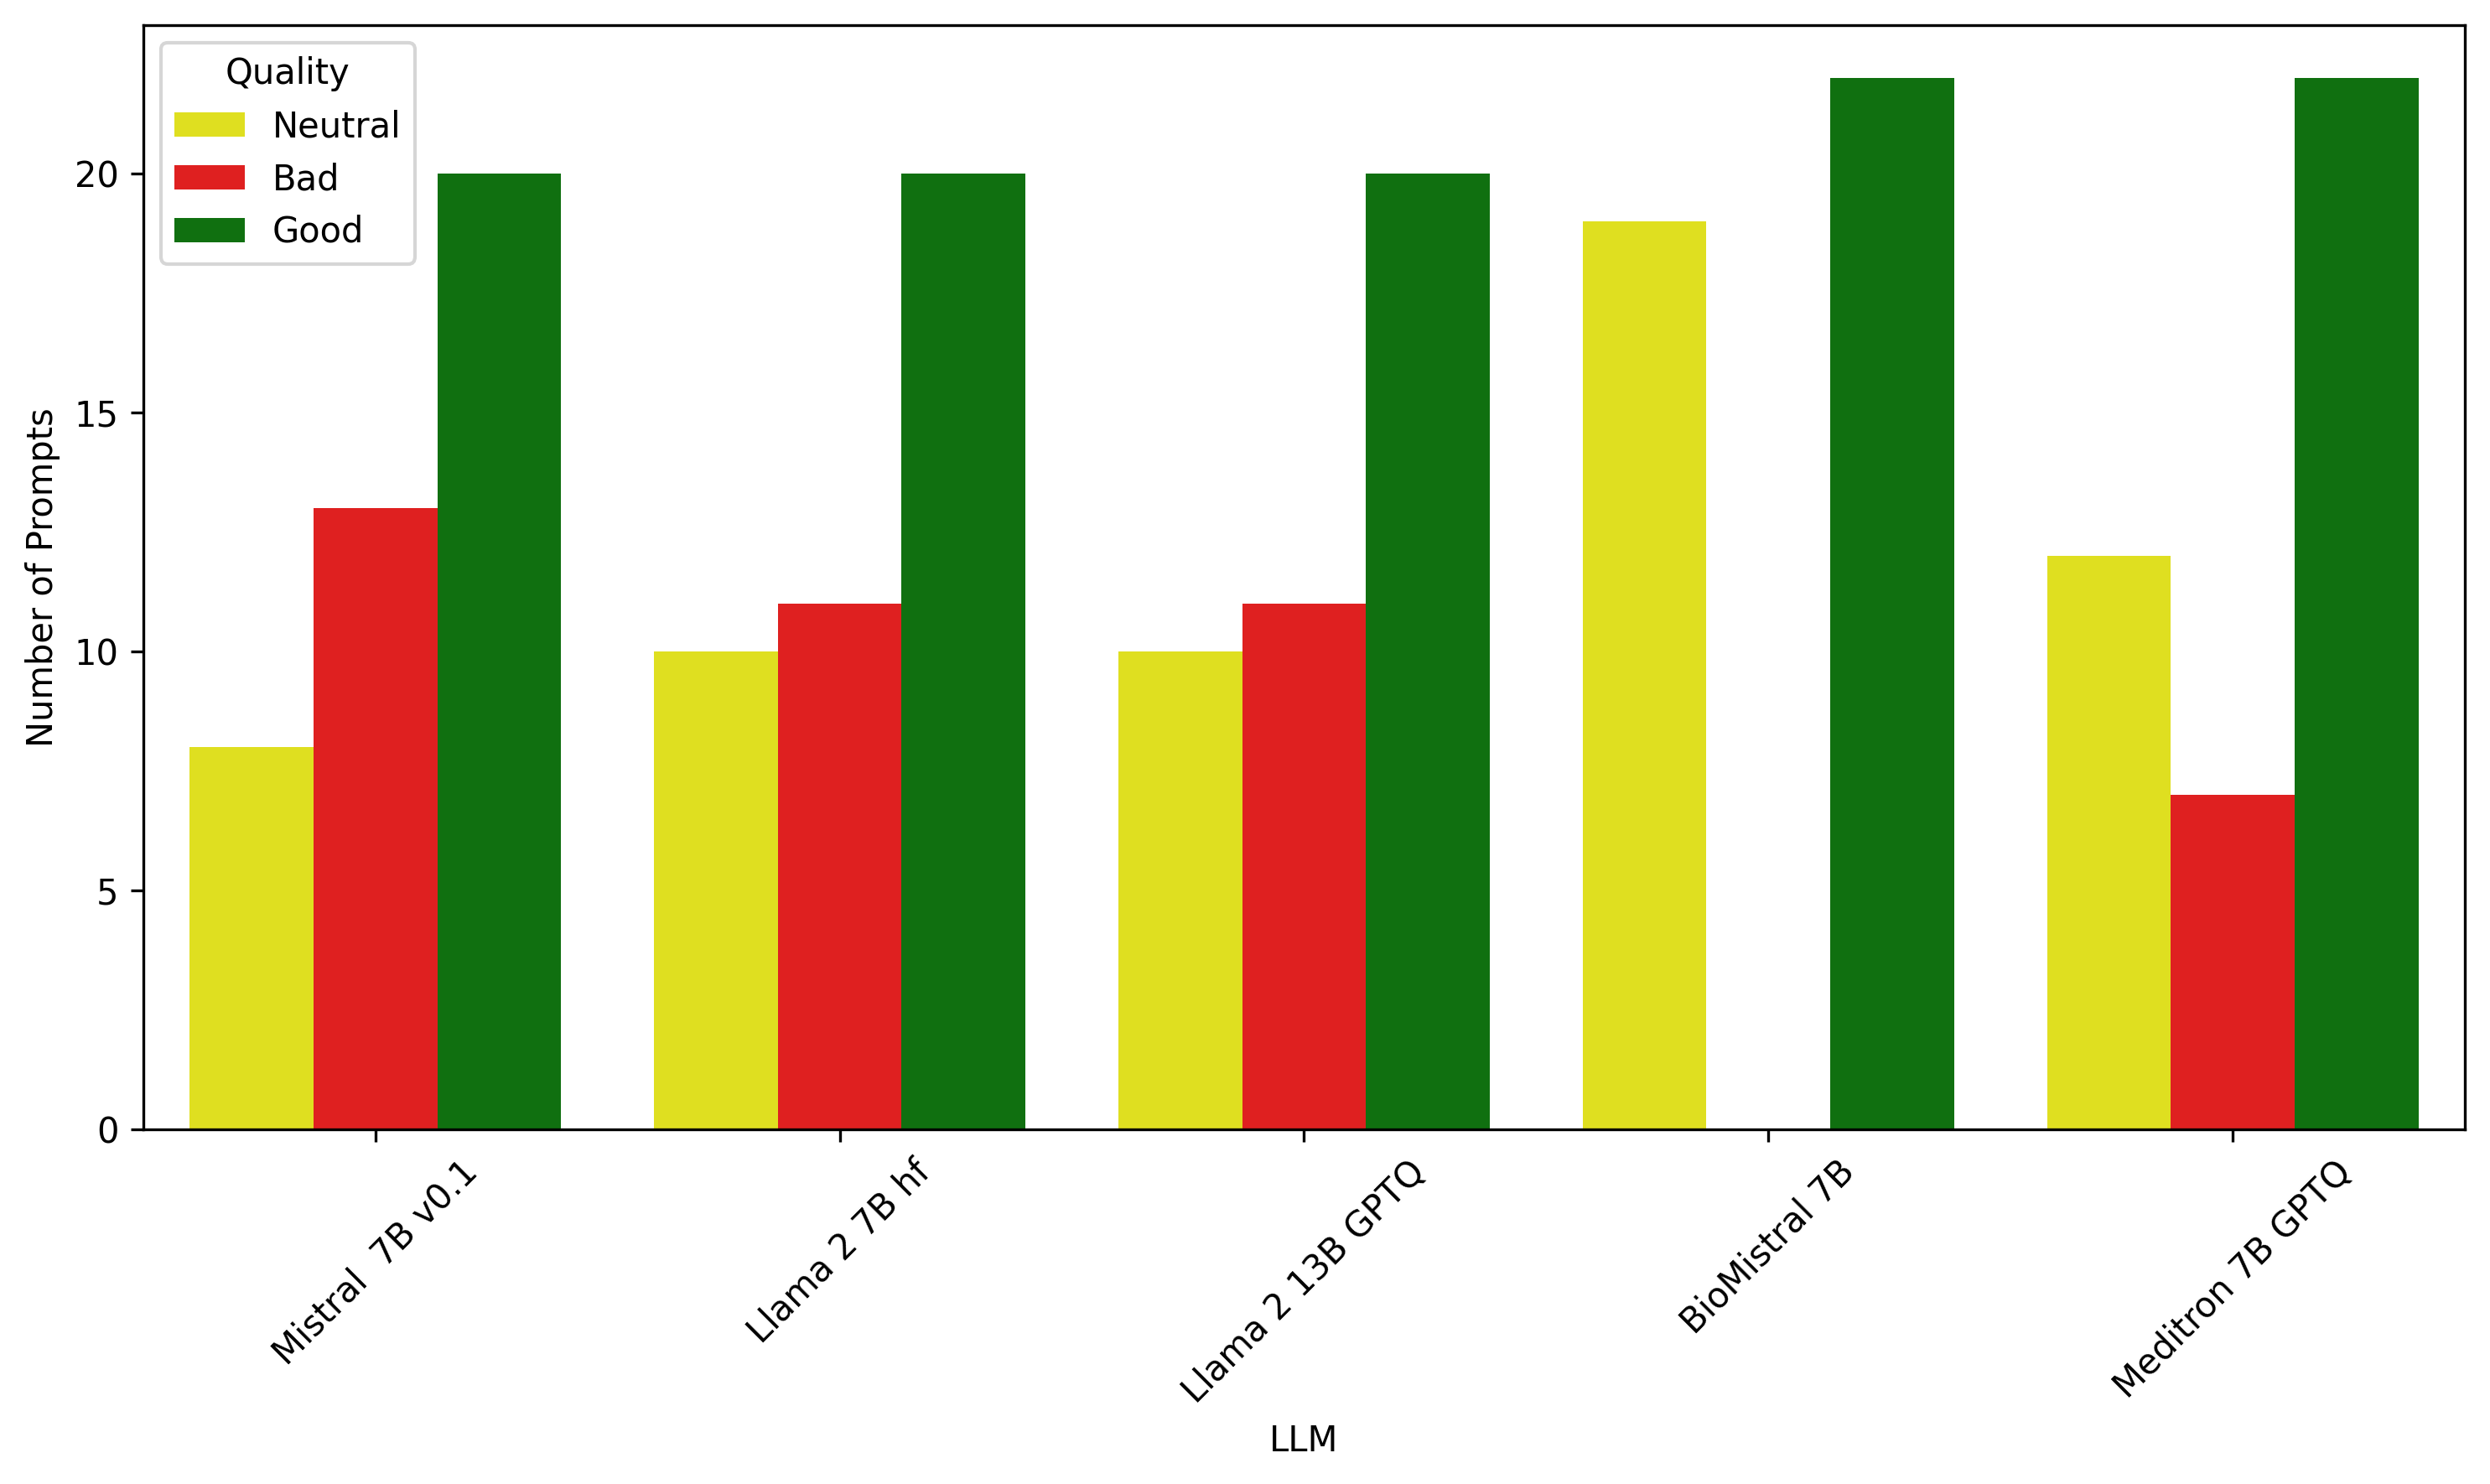

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a high-resolution figure
plt.figure(figsize=(10, 6), dpi=300)  # Increase dpi for higher resolution

# Plot
sns.countplot(
    data=df,
    x='LLM',
    hue='Quality_Interaction_Type_Simplified',
    palette={'Good': 'green', 'Neutral': 'yellow', 'Bad': 'red'}
)

# Labels, legend, and layout
plt.ylabel("Number of Prompts")
plt.legend(title='Quality')
plt.xticks(rotation=45)
plt.tight_layout()

# Show figure
plt.show()


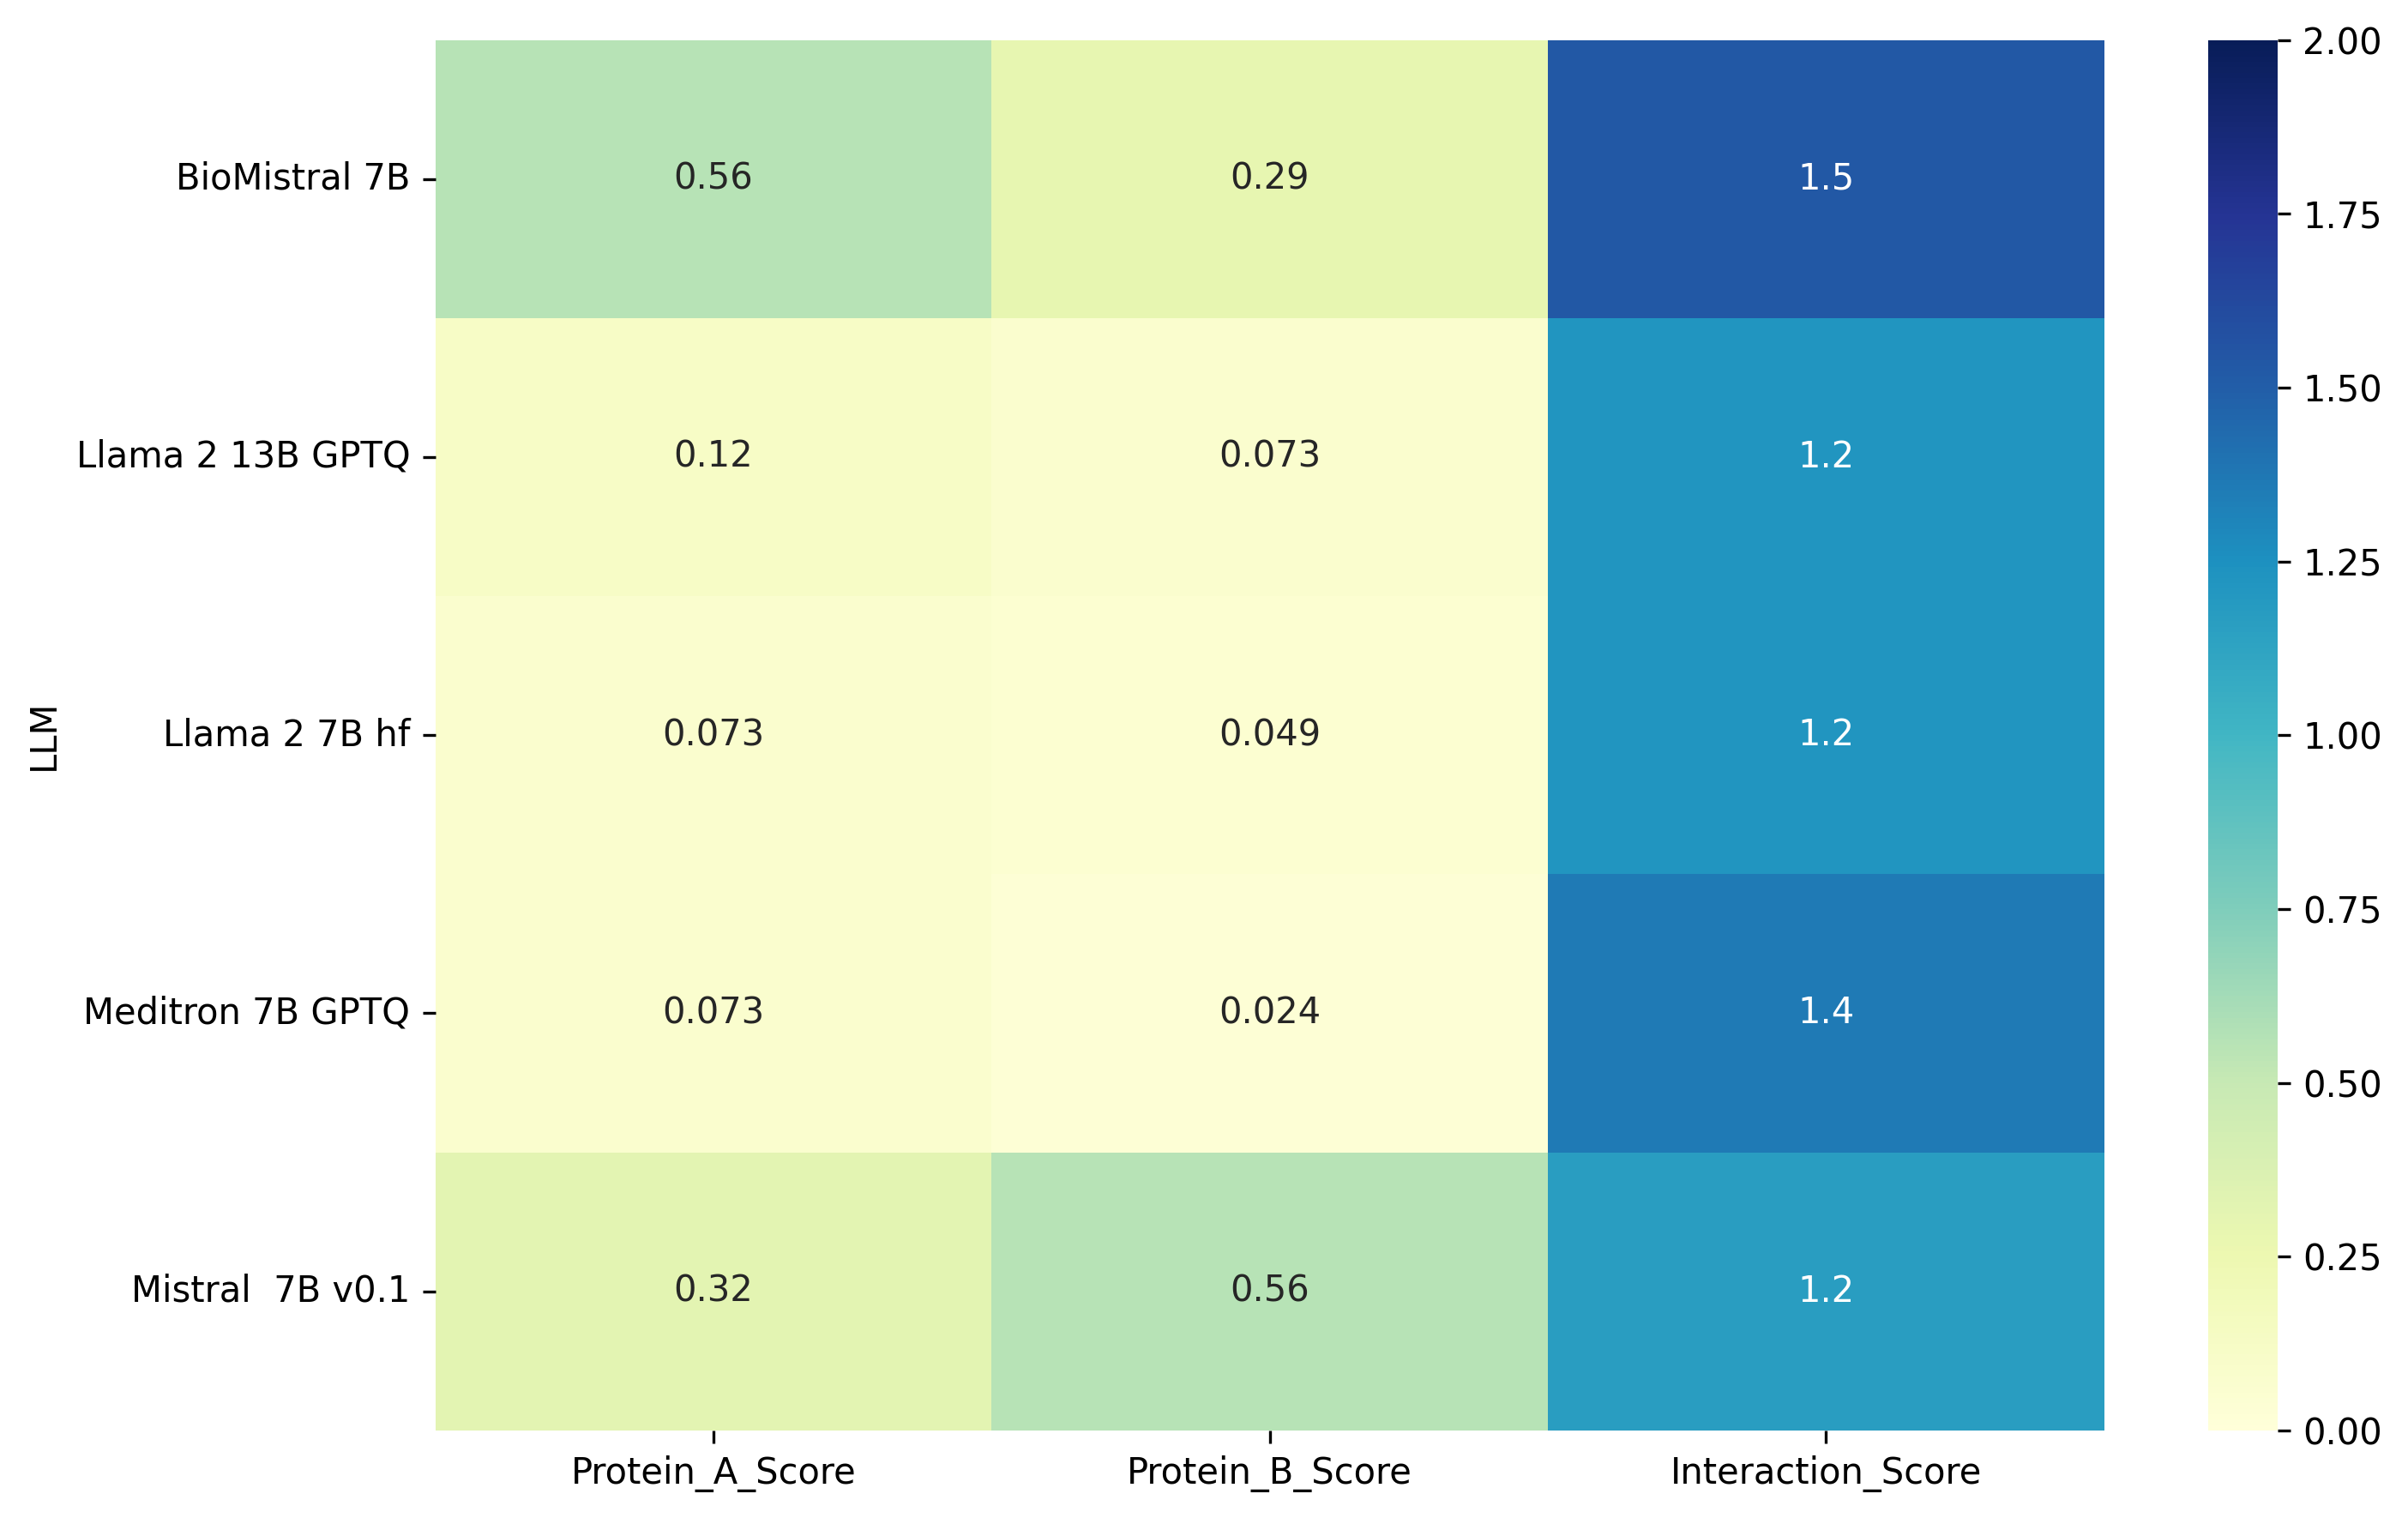

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Map to numeric scores
quality_map = {'Good': 2, 'Neutral': 1, 'Bad': 0}
df['Protein_A_Score'] = df['Quality_Protein_A_Simplified'].map(quality_map)
df['Protein_B_Score'] = df['Quality_Protein_B_Simplified'].map(quality_map)
df['Interaction_Score'] = df['Quality_Interaction_Type_Simplified'].map(quality_map)

# Create pivot table
pivot = df.groupby('LLM')[['Protein_A_Score', 'Protein_B_Score', 'Interaction_Score']].mean()

# Create high-resolution figure
plt.figure(figsize=(10, 6), dpi=300)  # Increase dpi for higher resolution

# Plot heatmap
sns.heatmap(pivot, annot=True, cmap='YlGnBu', vmin=0, vmax=2)

# Layout adjustments
plt.tight_layout()

# Show figure
plt.show()


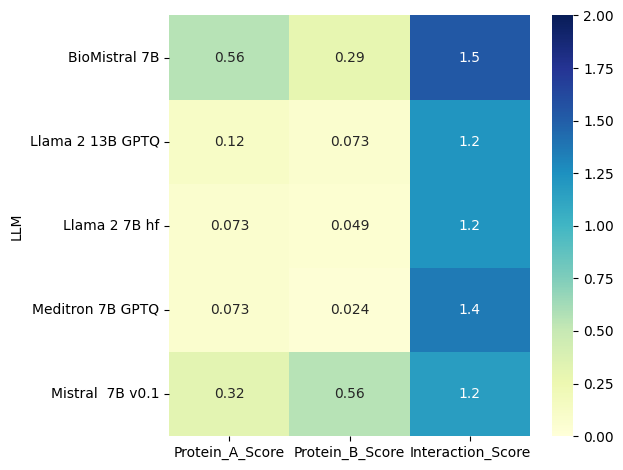

In [13]:
import numpy as np
import seaborn as sns

# Map to numeric scores
quality_map = {'Good': 2, 'Neutral': 1, 'Bad': 0}
df['Protein_A_Score'] = df['Quality_Protein_A_Simplified'].map(quality_map)
df['Protein_B_Score'] = df['Quality_Protein_B_Simplified'].map(quality_map)
df['Interaction_Score'] = df['Quality_Interaction_Type_Simplified'].map(quality_map)

# Create pivot table
pivot = df.groupby('LLM')[['Protein_A_Score', 'Protein_B_Score', 'Interaction_Score']].mean()

# Plot heatmap
sns.heatmap(pivot, annot=True, cmap='YlGnBu', vmin=0, vmax=2)
#plt.title("Average Quality Score per LLM and Output Type")
plt.tight_layout()
plt.show()


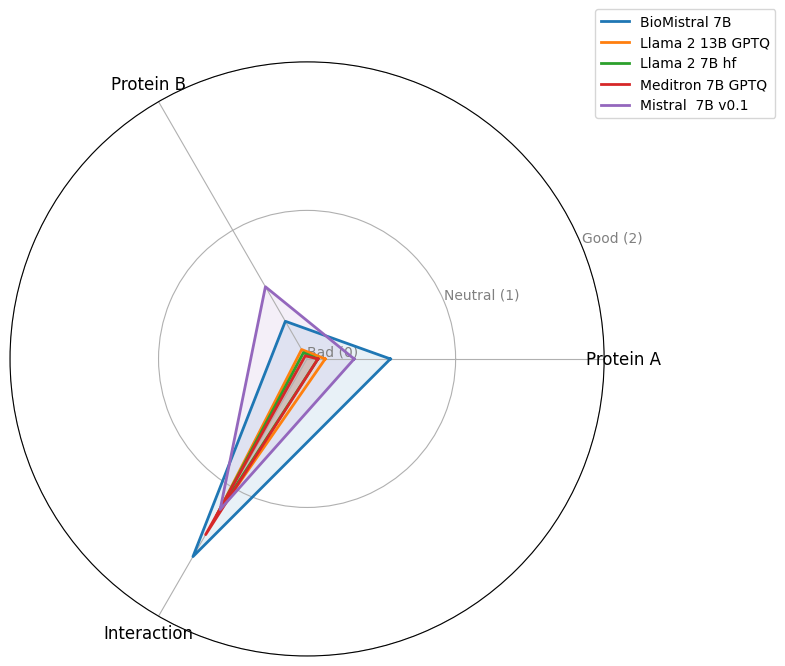

In [14]:
import numpy as np
import matplotlib.pyplot as plt

grouped = df.groupby('LLM')[['Protein_A_Score', 'Protein_B_Score', 'Interaction_Score']].mean().reset_index()

# Set up categories
categories = ['Protein A', 'Protein B', 'Interaction']
num_vars = len(categories)

# Prepare radar chart angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # to close the circle

# Radar chart setup
plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)

# Plot each LLM
for i, row in grouped.iterrows():
    values = row[['Protein_A_Score', 'Protein_B_Score', 'Interaction_Score']].tolist()
    values += values[:1]  # to close the polygon
    plt.plot(angles, values, label=row['LLM'], linewidth=2)
    plt.fill(angles, values, alpha=0.1)

# Aesthetic settings
plt.xticks(angles[:-1], categories, fontsize=12)
plt.yticks([0, 1, 2], ['Bad (0)', 'Neutral (1)', 'Good (2)'], color='grey', size=10)
plt.ylim(0, 2)
#plt.title("LLM Performance Comparison Across Tasks", size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


## Selection of best prompts


* 3 goods
* 2 goods and 1 neutral
* 1 good and 2 neutral


In [20]:
# Define a function to apply to each row
def match_prompt(row):
    qualities = [row['Quality_Protein_A_Simplified'], row['Quality_Protein_B_Simplified'], row['Quality_Interaction_Type_Simplified']]
    g = qualities.count('Good')
    n = qualities.count('Neutral')
    
    return (g == 3) or (g == 2 and n == 1) or (g == 1 and n == 2)

# Apply filter
filtered = df[df.apply(match_prompt, axis=1)]

# Drop duplicate prompts (across models)
filtered_unique = filtered

# Show number of unique prompts
print(f"Number of unique prompts matching the criteria: {filtered_unique.shape[0]}")

# If you want the actual dataset:
filtered_unique_df = filtered_unique[['Prompt', 'Quality_Protein_A_Simplified', 'Quality_Protein_B_Simplified', 'Quality_Interaction_Type_Simplified']]
filtered_unique_df


Number of unique prompts matching the criteria: 10


,Prompt,Quality_Protein_A_Simplified,Quality_Protein_B_Simplified,Quality_Interaction_Type_Simplified
9,10,Good,Neutral,Good
21,22,Neutral,Neutral,Good
24,25,Neutral,Neutral,Good
25,26,Good,Good,Good
28,29,Neutral,Neutral,Good
29,30,Neutral,Neutral,Good
31,32,Neutral,Neutral,Good
128,6,Good,Good,Neutral
129,7,Good,Neutral,Neutral
158,36,Neutral,Neutral,Good
